##Callable Swap
Callable Swap은 일반 금리 스왑과 비슷하지만, 특정 시점에 스왑을 조기 종료할 수 있는 옵션을 포함하고 있습니다. 따라서 Callable Swap의 가치를 계산하기 위해서는 조기 종료 옵션의 가치를 고려해야 합니다.

In [2]:
import matplotlib.font_manager as fm

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<ipython-input-3-352465bea1ec>:8: RuntimeWarning: invalid value encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


Callable Swap의 현재 가치: nan


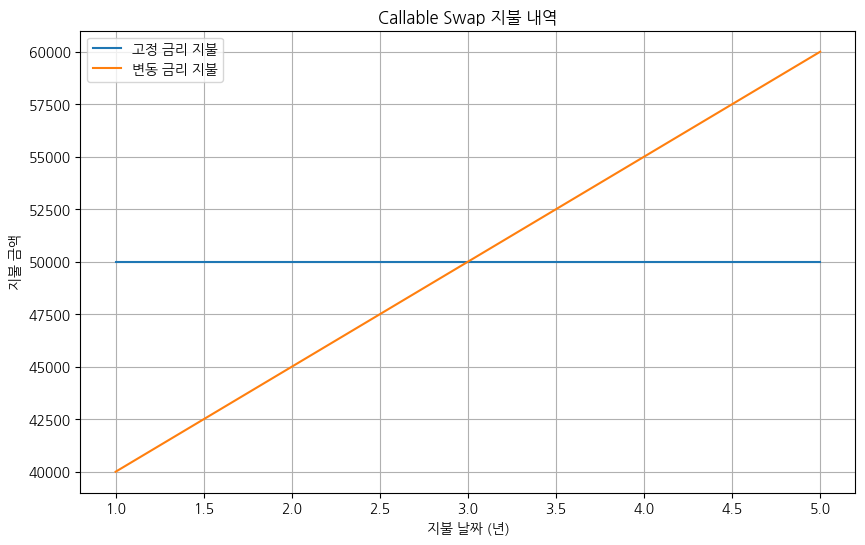

In [3]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import matplotlib.pyplot as plt

# 블랙-숄즈 모델을 사용하여 옵션 가격을 계산하는 함수
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Callable Swap의 현재 가치 계산 함수
def callable_swap_value(notional, fixed_rate, floating_rates, swap_start, swap_end, payment_dates, discount_factors, call_date, call_strike, volatility):
    """
    notional: 명목 금액
    fixed_rate: 고정 금리
    floating_rates: 변동 금리
    swap_start: 스왑 시작 시점
    swap_end: 스왑 종료 시점
    payment_dates: 지불 날짜 배열
    discount_factors: 할인율 배열
    call_date: 콜 옵션 행사 날짜
    call_strike: 콜 옵션 행사가격
    volatility: 변동성
    """
    # 고정 금리 지불 계산
    fixed_leg_payments = notional * fixed_rate * np.diff(payment_dates, prepend=swap_start)

    # 변동 금리 지불 계산
    floating_leg_payments = notional * floating_rates * np.diff(payment_dates, prepend=swap_start)

    # 스왑의 현재 가치 계산
    swap_value = np.sum((floating_leg_payments - fixed_leg_payments) * discount_factors)

    # 콜 옵션의 가치 계산 (스왑을 조기에 종료할 수 있는 권리)
    time_to_call = call_date - swap_start
    option_value = black_scholes_call(swap_value, call_strike, time_to_call, np.mean(discount_factors), volatility)

    return swap_value - option_value

# 예시 데이터
notional = 1000000  # 명목 금액
fixed_rate = 0.05  # 고정 금리 (5%)
floating_rates = np.array([0.04, 0.045, 0.05, 0.055, 0.06])  # 변동 금리
swap_start = 0  # 스왑 시작 시점
swap_end = 5    # 스왑 종료 시점
payment_dates = np.array([1, 2, 3, 4, 5])  # 지불 날짜 (스왑 시작 후 매년)
discount_factors = np.exp(-0.05 * payment_dates)  # 할인율
call_date = 3  # 콜 옵션 행사 날짜 (3년 후)
call_strike = 0.05  # 콜 옵션 행사가격
volatility = 0.2  # 변동성

# Callable Swap의 현재 가치 계산
callable_swap_val = callable_swap_value(notional, fixed_rate, floating_rates, swap_start, swap_end, payment_dates, discount_factors, call_date, call_strike, volatility)
print(f"Callable Swap의 현재 가치: {callable_swap_val:.2f}")

# 시각화
fixed_leg_payments = notional * fixed_rate * np.diff(payment_dates, prepend=swap_start)
floating_leg_payments = notional * floating_rates * np.diff(payment_dates, prepend=swap_start)

plt.figure(figsize=(10, 6))
plt.plot(payment_dates, fixed_leg_payments, label='고정 금리 지불')
plt.plot(payment_dates, floating_leg_payments, label='변동 금리 지불')
plt.xlabel('지불 날짜 (년)')
plt.ylabel('지불 금액')
plt.title('Callable Swap 지불 내역')
plt.legend()
plt.grid(True)
plt.show()


두 기업의 주식 수익률을 스왑하고, 특정 시점에 스왑을 조기에 종료할 수 있는 Callable Swap

<ipython-input-4-b16459ee0e1f>:7: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Callable Swap의 현재 가치: 0.00


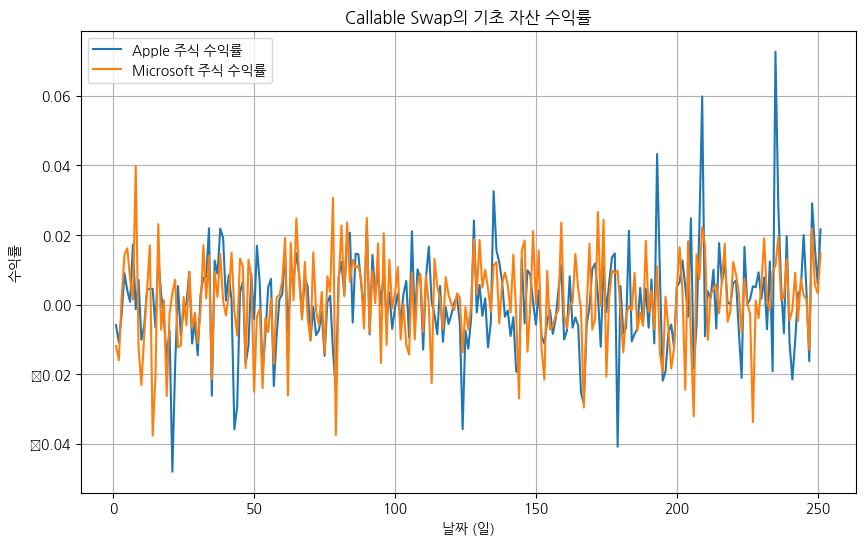

In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 블랙-숄즈 모델을 사용하여 옵션 가격을 계산하는 함수
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Callable Swap의 현재 가치 계산 함수
def callable_swap_value(stock1_prices, stock2_prices, swap_start, swap_end, payment_dates, discount_factors, call_date, call_strike, volatility):
    """
    stock1_prices: 첫 번째 주식 가격 배열
    stock2_prices: 두 번째 주식 가격 배열
    swap_start: 스왑 시작 시점
    swap_end: 스왑 종료 시점
    payment_dates: 지불 날짜 배열
    discount_factors: 할인율 배열
    call_date: 콜 옵션 행사 날짜
    call_strike: 콜 옵션 행사가격
    volatility: 변동성
    """
    # 주식 수익률 계산
    stock1_returns = np.diff(stock1_prices) / stock1_prices[:-1]
    stock2_returns = np.diff(stock2_prices) / stock2_prices[:-1]

    # 스왑의 현재 가치 계산
    swap_value = np.sum((stock2_returns - stock1_returns) * discount_factors[:len(stock1_returns)])

    # 콜 옵션의 가치 계산 (스왑을 조기에 종료할 수 있는 권리)
    time_to_call = call_date - swap_start
    option_value = black_scholes_call(swap_value, call_strike, time_to_call, np.mean(discount_factors), volatility)

    return swap_value - option_value

# 실제 데이터 가져오기
# Apple Inc. 주가 데이터
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
apple_prices = apple_data['Close'].values

# Microsoft Corp. 주가 데이터
microsoft = yf.Ticker("MSFT")
microsoft_data = microsoft.history(period="1y")
microsoft_prices = microsoft_data['Close'].values

# 기본 변수 설정
swap_start = 0  # 스왑 시작 시점
swap_end = len(apple_prices)  # 스왑 종료 시점 (1년 후)
payment_dates = np.arange(1, swap_end + 1)  # 지불 날짜 (일 단위)
discount_factors = np.exp(-0.05 * payment_dates / 252)  # 할인율 (일 단위로 계산)
call_date = 126  # 콜 옵션 행사 날짜 (6개월 후, 252 거래일 기준)
call_strike = 0.0  # 콜 옵션 행사가격 (스왑 가치의 행사가격)
volatility = 0.2  # 변동성

# Callable Swap의 현재 가치 계산
callable_swap_val = callable_swap_value(apple_prices, microsoft_prices, swap_start, swap_end, payment_dates, discount_factors, call_date, call_strike, volatility)
print(f"Callable Swap의 현재 가치: {callable_swap_val:.2f}")

# 시각화
apple_returns = np.diff(apple_prices) / apple_prices[:-1]
microsoft_returns = np.diff(microsoft_prices) / microsoft_prices[:-1]

plt.figure(figsize=(10, 6))
plt.plot(payment_dates[:-1], apple_returns, label='Apple 주식 수익률')
plt.plot(payment_dates[:-1], microsoft_returns, label='Microsoft 주식 수익률')
plt.xlabel('날짜 (일)')
plt.ylabel('수익률')
plt.title('Callable Swap의 기초 자산 수익률')
plt.legend()
plt.grid(True)
plt.show()
